In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1596, 12)

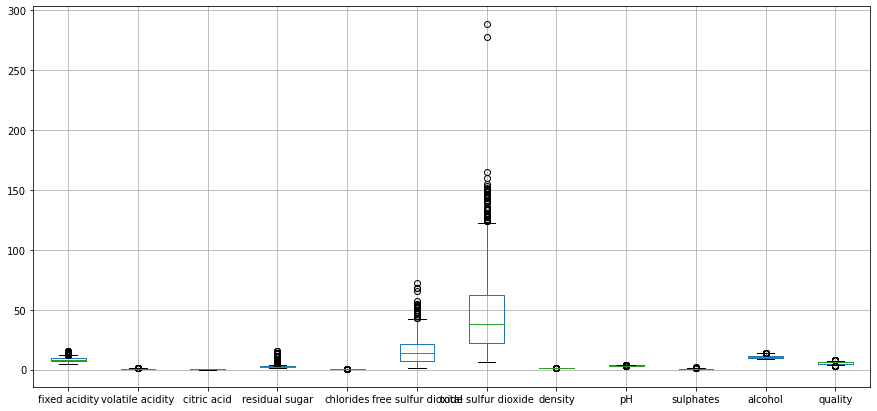

In [4]:
plt.figure(figsize=(15,7))
df.boxplot()

In [5]:
def removeOutliers(data):
    Q1=data.quantile(0.25)
    Q3=data.quantile(0.75)
    IQR=Q3-Q1
    upper=np.where(data>=(Q3+1.5*IQR))
    lower=np.where(data <= (Q1-1.5*IQR))
    data.drop(upper[0],axis="index",inplace=True)
    #data.drop(lower[0],axis="index",inplace=True)

In [6]:
data=df
removeOutliers(data)

In [7]:
data.shape

(1196, 12)

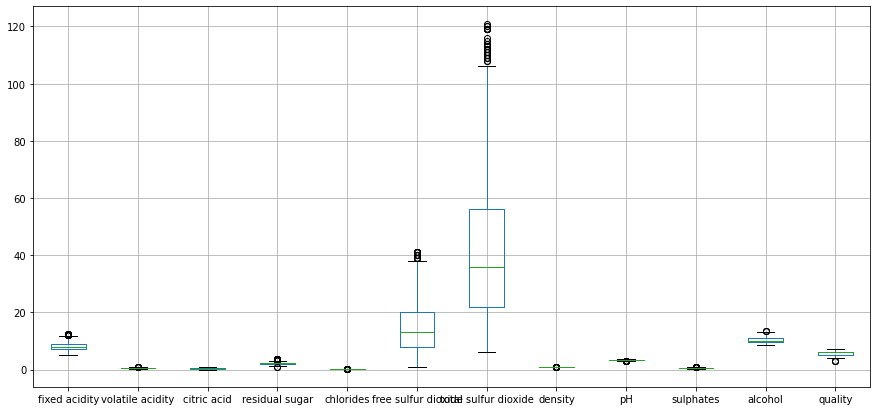

In [8]:
data.boxplot(figsize=(15,7))

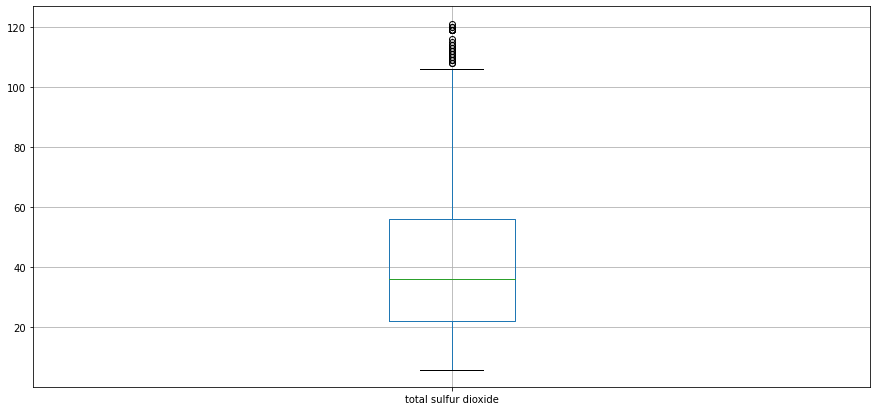

In [9]:
df[["total sulfur dioxide"]].boxplot(figsize=(15,7))

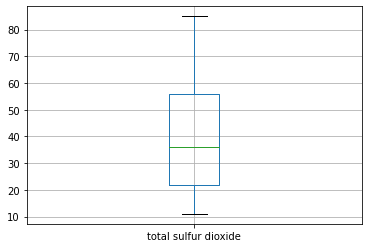

In [10]:
lower=df[["total sulfur dioxide"]].quantile(0.05)[0]
upper=df[["total sulfur dioxide"]].quantile(0.90)[0]

df[["total sulfur dioxide"]].clip(lower,upper).boxplot()

In [11]:
def clipValues(df,lower,upper):
    for col in df.columns:
        l=df[col].quantile(lower) 
        u=df[col].quantile(upper)
        df[col]=df[col].clip(l,u)
    return df

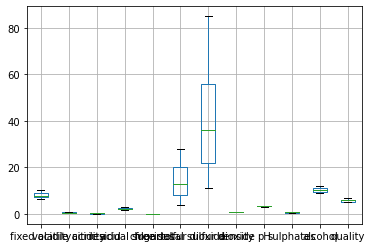

In [12]:
data1=df
data1=clipValues(data1,0.05,0.9)
data1.boxplot()

In [13]:
data1.shape

(1196, 12)